<a href="https://colab.research.google.com/github/moizahmed813/CODSOFT/blob/main/Iris%20Flower%20Classification/IrisFlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Importing all necessary classes
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [13]:
# Reading from the given dataset
iris_df = pd.read_csv("IRIS.csv")

In [14]:
# Viewing information available in the dataset
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [15]:
# Viewing the description in the dataset to gain better insights.
print(iris_df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [16]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Figure size 800x600 with 0 Axes>

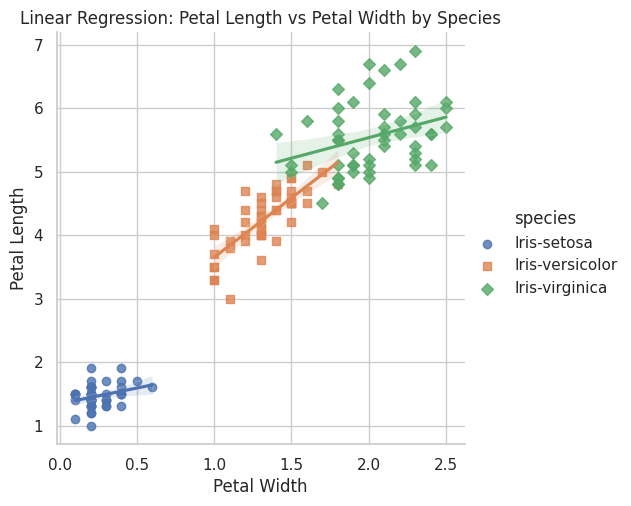

In [17]:
# Visualizing the petal length vs petal width by species using Linear Regression Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lmplot(x='petal_width', y='petal_length', data=iris_df, hue='species', markers=["o", "s", "D"])
plt.title('Linear Regression: Petal Length vs Petal Width by Species')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.show()

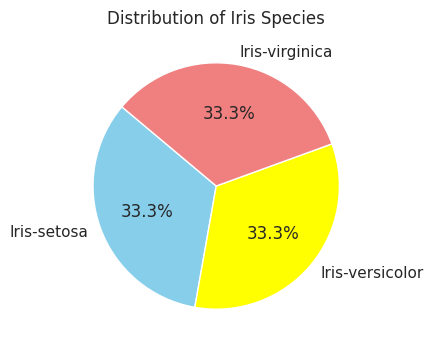

In [18]:
# Visualizing the disctribution of Iris species using Pie Chart
species_counts = iris_df['species'].value_counts()
plt.figure(figsize=(5, 4))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'yellow', 'lightcoral'])
plt.title('Distribution of Iris Species')
plt.show()

In [30]:
# Using machine different learning models to check accuracy for Flower Classification

# Split features and labels
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

results = []
for name, classifier in classifiers:
    classifier.fit(X_train_scaled, y_train)
    y_prediction = classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_prediction)
    report = classification_report(y_test, y_prediction)
    results.append((name, accuracy))
    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print(report)
    print('_' * 60)
    print()

Model: Logistic Regression
Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

____________________________________________________________

Model: Decision Tree
Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

__________________________________________________________

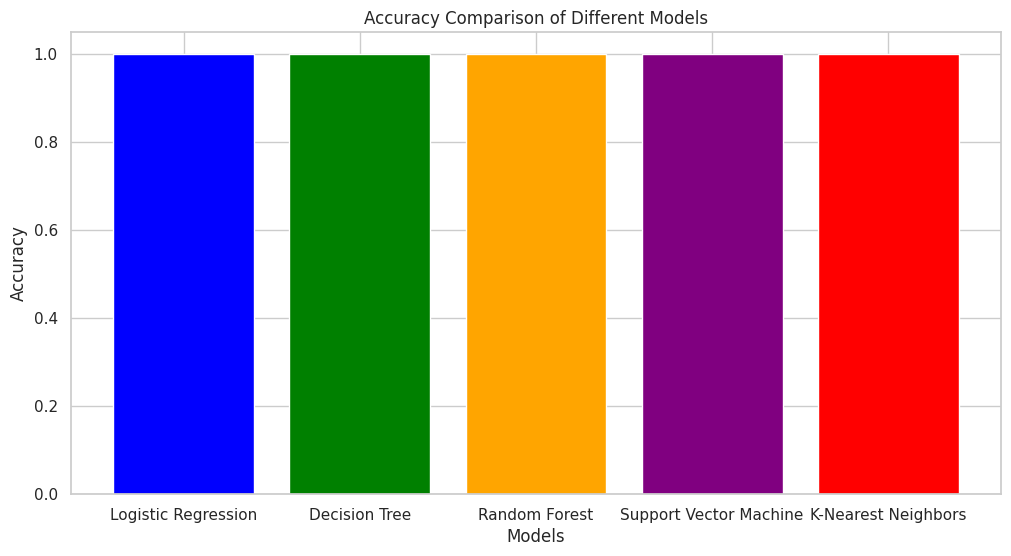

In [35]:
# Visualizing the accuracy for all models using a bar plot
model_names = [name for name, _ in results]
accuracies = [accuracy for _, accuracy in results]
colors = ['blue', 'green', 'orange', 'purple', 'red']

plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.show()